In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fcmeans_softwrd import FCM
from sklearn.cluster import MeanShift

In [2]:
# Prepare data
df = pd.read_csv('IRIS.xls')  
X = df.iloc[:, :-1].values  
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Fuzzy clustering using the c-means method
fcm = FCM(n_clusters=3) 
fcm.fit(X)

labels = fcm.predict(X)
centers = fcm.centers

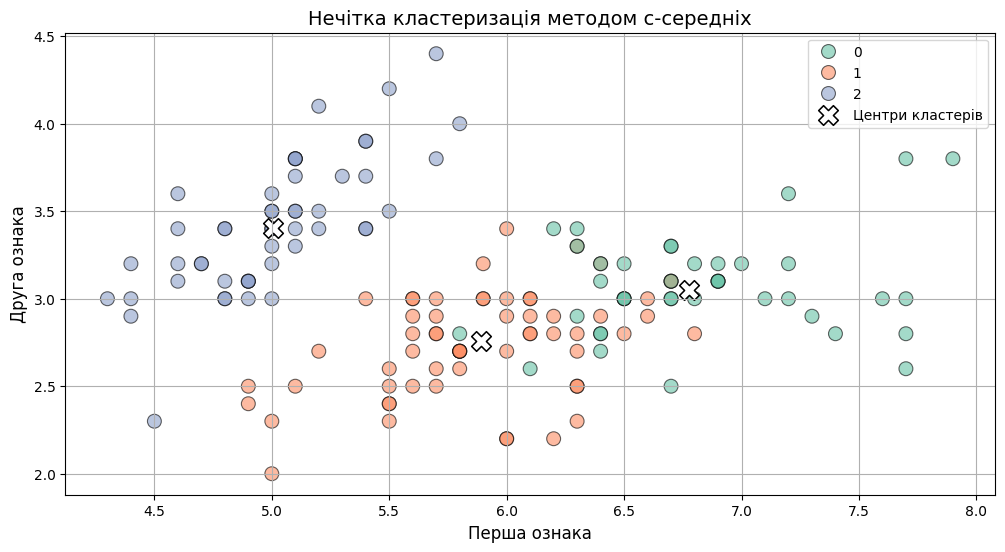

In [4]:
# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set2', s=100, alpha=0.6, edgecolor='k')
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], c='w', marker='X', s=200, edgecolor="black", label='Центри кластерів')

plt.title('Нечітка кластеризація методом c-середніх', fontsize=14)
plt.xlabel('Перша ознака', fontsize=12)
plt.ylabel('Друга ознака', fontsize=12)
plt.grid()
plt.legend()
plt.show()

In [5]:
# Subtractive clustering
mean_shift = MeanShift(bandwidth=2)
mean_shift.fit(X)

# Getting cluster labels
labels = mean_shift.labels_
centers = mean_shift.cluster_centers_

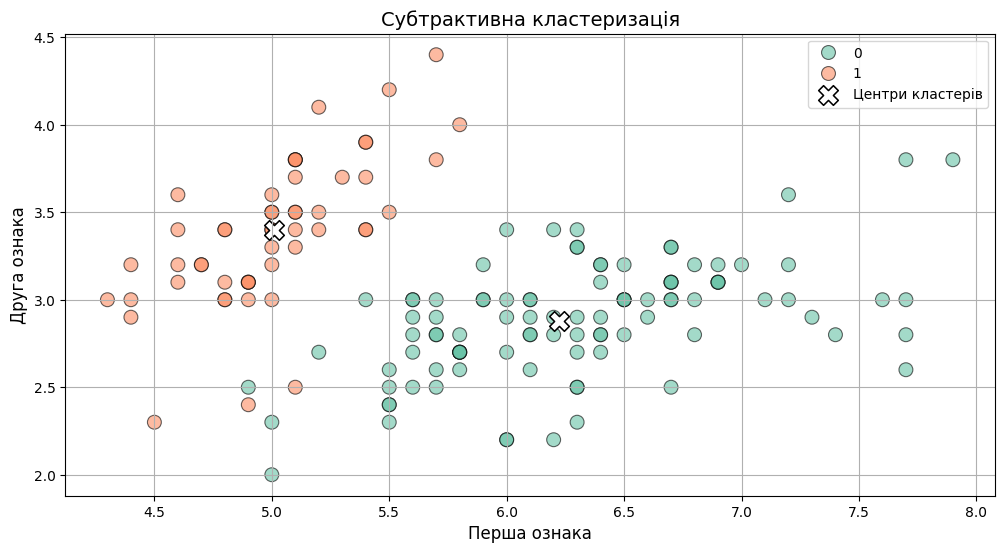

In [6]:
# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set2', s=100, alpha=0.6, edgecolor='k')
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], c='w', marker='X', s=200, edgecolor="black", label='Центри кластерів')

plt.title('Субтрактивна кластеризація', fontsize=14)
plt.xlabel('Перша ознака', fontsize=12)
plt.ylabel('Друга ознака', fontsize=12)
plt.grid()
plt.legend()
plt.show()